<a href="https://colab.research.google.com/github/edgarriba/kornia-examples/blob/master/data_augmenation_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augmentation Semantic Segmentation**

In this tutorial we will show we can quickly perform **data augmentation for semantic segmenation** using the `kornia.augmentation` API.

The API is under refactoring, *NOTICE* that this might be different in the near future.

## Install and get data

We install Kornia and some dependencies, and download a simple data sample

In [6]:
pip install kornia opencv-python matplotlib

In [7]:
!wget http://www.zemris.fer.hr/~ssegvic/multiclod/images/causevic16semseg3.png

--2020-03-25 14:48:37--  http://www.zemris.fer.hr/~ssegvic/multiclod/images/causevic16semseg3.png
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203296 (199K) [image/png]
Saving to: ‘causevic16semseg3.png.3’

causevic16semseg3.p 100%[===================>] 198.53K   509KB/s    in 0.4s    

2020-03-25 14:48:38 (509 KB/s) - ‘causevic16semseg3.png.3’ saved [203296/203296]

--2020-03-25 14:48:44--  http://www.zemris.fer.hr/~ssegvic/multiclod/images/causevic16semseg3.png
Resolving www.zemris.fer.hr (www.zemris.fer.hr)... 31.147.204.179
Connecting to www.zemris.fer.hr (www.zemris.fer.hr)|31.147.204.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203296 (199K) [image/png]
Saving to: ‘causevic16semseg3.png.4’

causevic16semseg3.p 100%[===================>] 198.53K   510KB/s    in 0.4s    

2020-03-25 14:48:44 

In [0]:
# import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

import torch
import torch.nn as nn
import kornia as K

## Define Augmentation pipeline

We define a class to define our augmentation API using an `nn.Module`

In [0]:
class MyAugmentation(nn.Module):
  def __init__(self):
    super(MyAugmentation, self).__init__()
    # we define and cache our operators as class members
    self.k1 = K.augmentation.ColorJitter(0.15, 0.25, 0.25, 0.25)
    self.k2 = K.augmentation.RandomAffine([-45., 45.])
  
  def forward(self, img: torch.Tensor, mask: torch.Tensor) -> torch.Tensor:
    # 1. apply color only in image
    # 2. apply geometric tranform
    img_out = self.k2(self.k1(img))

    # 3. infer geometry params to mask
    # TODO: this will change in future so that no need to infer params
    mask_out = self.k2(mask, self.k2._params)

    return img_out, mask_out

Load the data and apply the transforms

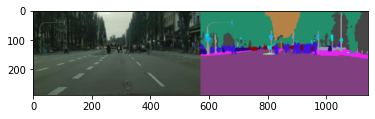

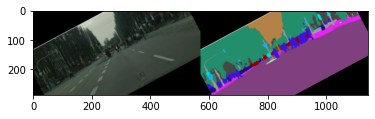

In [21]:
def load_data(data_path: str) -> torch.Tensor:
  data: np.ndarray = cv2.imread(data_path, cv2.IMREAD_COLOR)
  data_t: torch.Tensor = K.image_to_tensor(data, keepdim=False)
  data_t = K.normalize(data_t, 0., 255.)
  img, labels = data_t[..., :571], data_t[..., 572:]
  return img, labels

# load data (B, C, H, W)
img, labels = load_data("causevic16semseg3.png")

# create augmentation instance
aug = MyAugmentation()

# apply the augmenation pipelone to our batch of data
img_aug, labels_aug = aug(img, labels)

# visualize
img_out1 = torch.cat([img, labels], dim=-1)
plt.imshow(K.tensor_to_image(img_out1))
plt.figure()

img_out2 = torch.cat([img_aug, labels_aug], dim=-1)
plt.imshow(K.tensor_to_image(img_out2))